# IF3070 Foundations of Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 1

Group Members:
- Jihan Aurelia (18222001)
- Nasywaa Anggun Athiefah (18222021)
- Ricky Wijaya (18222043)
- Timotius Vivaldi Gunawan (18222091)

## Import Libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import other libraries if needed
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin
from urllib.parse import urlparse

## Import Dataset

In [49]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

df = pd.read_csv('train.csv')
df

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140399,235790,49490.txt,NaN,NaN,www.slavevoyages.org,NaN,0.0,NaN,1.000000,0.079963,...,NaN,0.0,1.0,23.0,3.0,6.0,NaN,12.0,NaN,1
140400,235791,NaN,https://www.greenmountainenergy.com,34.0,www.greenmountainenergy.com,NaN,0.0,com,1.000000,0.522907,...,1.0,NaN,1.0,26.0,NaN,NaN,169.0,15.0,40.0,1
140401,235792,NaN,https://www.leadcastingcall.com,30.0,www.leadcastingcall.com,23.0,NaN,NaN,1.000000,0.522907,...,0.0,0.0,1.0,25.0,NaN,NaN,87.0,1.0,93.0,1
140402,235794,NaN,https://www.fedarb.com,21.0,NaN,14.0,NaN,NaN,1.000000,0.522907,...,0.0,0.0,1.0,NaN,36.0,NaN,102.0,NaN,NaN,1


In [50]:
copy_df = df.copy()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [51]:
from sklearn.model_selection import train_test_split

# Save original training set
train_set_ori = df.copy()

# Split training set and validation set
train_set, val_set,  = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [52]:
# Mencari jumlah missing value dan proporsinya
def null_stats(data):
    null_counts = data.isnull().sum()
    null_percentage = (null_counts / len(data) * 100).round(2)

    null_df = pd.DataFrame({
        'Total Null Values': null_counts,
        'Percentage of Nulls (%)': null_percentage
    })

    null_df = null_df[null_df['Total Null Values'] > 0].sort_values(by='Total Null Values', ascending=False)

    return null_df

In [53]:
null_stats(df)

,Total Null Values,Percentage of Nulls (%)
Domain,70197,50.00
NoOfExternalRef,69379,49.41
LineOfCode,69153,49.25
HasSocialNet,67999,48.43
LargestLineLength,67928,48.38
NoOfURLRedirect,67384,47.99
HasCopyrightInfo,67345,47.97
NoOfCSS,67134,47.81
NoOfObfuscatedChar,66798,47.58
NoOfSelfRedirect,66715,47.52


In [54]:
class HandleLength(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # No fitting process needed
        return self
    
    def transform(self, X):
        # Copy the DataFrame to avoid modifying the original
        X_transformed = X.copy()
        
        # Drop rows where URL is completely NaN
        X_transformed = X_transformed.dropna(subset=['URL'])
        
        # Impute Domain using URL if Domain is NaN
        def extract_domain(url):
            try:
                parsed_url = urlparse(url)
                return parsed_url.netloc if parsed_url.netloc else None
            except:
                return None

        X_transformed['Domain'] = X_transformed.apply(
            lambda row: extract_domain(row['URL']) if pd.isna(row['Domain']) else row['Domain'], axis=1
        )
        
        # Fill URLLength with the lengths of URL strings
        X_transformed['URLLength'] = X_transformed['URL'].apply(lambda x: len(str(x)) if pd.notna(x) else None)
        
        # Fill DomainLength with the lengths of Domain strings
        X_transformed['DomainLength'] = X_transformed['Domain'].apply(lambda x: len(str(x)) if pd.notna(x) else None)
        
        return X_transformed

In [55]:
class HandleIsHTTPS(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # No fitting process needed
        return self
    
    def transform(self, X):
        # Copy the DataFrame to avoid modifying the original
        X_transformed = X.copy()
        
        # Drop rows where URL is completely NaN
        X_transformed = X_transformed.dropna(subset=['URL'])
        
        # Check if the URL contains HTTPS
        X_transformed['IsHTTPS'] = X_transformed['URL'].apply(
            lambda x: 1 if pd.notna(x) and urlparse(x).scheme.lower() == 'https' else 0
        )
        
        return X_transformed

In [56]:
import re

class HandleCharContinuationRate(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # No fitting process needed
        return self
    
    def transform(self, X):
        # Copy the DataFrame to avoid modifying the original
        X_transformed = X.copy()
        
        # Function to calculate CharContinuationRate
        def calculate_char_cont_rate(url):
            if not isinstance(url, str):
                return None  # Return None for invalid URLs
            
            # Find all alphabet, digit, or special character sequences
            sequences = re.findall(r'[a-zA-Z]+|\d+|[^a-zA-Z\d]+', url)
            
            # Calculate total length of sequences
            total_sequence_length = sum(len(seq) for seq in sequences)
            
            # Return the CharContinuationRate
            return total_sequence_length / len(url) if len(url) > 0 else 0

        # Impute missing CharContinuationRate values
        X_transformed['CharContinuationRate'] = X_transformed['CharContinuationRate'].fillna(
            X_transformed['URL'].apply(lambda x: calculate_char_cont_rate(x))
        )
        
        return X_transformed

In [57]:
class HandleHasTitle(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # No fitting process needed
        return self
    
    def transform(self, X):
        # Copy the DataFrame to avoid modifying the original
        X_transformed = X.copy()
        
        # Create HasTitle column: 1 if Title is not NaN, 0 otherwise
        X_transformed['HasTitle'] = X_transformed['Title'].apply(lambda x: 0 if pd.isna(x) else 1)
        
        return X_transformed

In [58]:
import re

class HandleURLTitleMatchScore(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # No fitting process needed
        return self
    
    def transform(self, X):
        
        X_transformed = X.copy()
    
        def url_title_match_score(title, url):
            if not isinstance(title, str) or not isinstance(url, str):
                return None  # Return None for invalid inputs
            
            # Split the title into a set of words
            t_set = title.split()
            
            # Clean the URL (remove https, http, www, and extract root domain)
            clean_url = re.sub(r'https?://|www\.', '', url).split('/')[0]  # Keep root domain
            
            # Compute baseScore
            base_score = 100 / len(clean_url) if len(clean_url) > 0 else 0
            
            # Calculate score
            score = 0
            for word in t_set:
                if word in clean_url:
                    score += base_score * len(word)
                    clean_url = clean_url.replace(word, "")  # Remove matched word from URL
                if score > 99.9:
                    score = 100
                    break
            
            return score
        
        X_transformed['URLTitleMatchScore'] = X_transformed['URLTitleMatchScore'].fillna(
            X_transformed.apply(
                lambda row: url_title_match_score(row['Title'], row['URL']), axis=1
            )
        )
        
        return X_transformed
        

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.tree import DecisionTreeRegressor

class FeatureImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Separate columns by type
        self.categorical_cols = ['TLD', 'Domain', 'FILENAME', 'URL', 'Title']
        self.boolean_cols = [
            'IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon',
            'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
            'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
            'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo'
        ]
        self.numerical_cols = list(set(X.columns) - set(self.categorical_cols) - set(self.boolean_cols))
        
        # Imputer for categorical columns (most frequent)
        self.cat_imputer = SimpleImputer(strategy='most_frequent')
        self.cat_imputer.fit(X[self.categorical_cols])
        
        # Imputer for boolean columns (mode)
        self.bool_mode_imputer = {}
        for col in self.boolean_cols:
            self.bool_mode_imputer[col] = X[col].mode()[0]
        
        # KNN Imputer for numerical columns
        self.knn_imputer = IterativeImputer(estimator=DecisionTreeRegressor(random_state=42))
        self.knn_imputer.fit(X[self.numerical_cols])
        
        return self
    
    def transform(self, X):
        X_imputed = X.copy()

        # Impute categorical columns
        X_imputed[self.categorical_cols] = self.cat_imputer.transform(X_imputed[self.categorical_cols])

        # Impute boolean columns using pre-calculated mode
        for col in self.boolean_cols:
            X_imputed[col].fillna(self.bool_mode_imputer[col], inplace=True)
            
        # Impute numerical columns using KNNImputer
        X_imputed[self.numerical_cols] = self.knn_imputer.transform(X_imputed[self.numerical_cols])
        
        return X_imputed


In [60]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_drop):
        self.features_to_drop = features_to_drop

    def fit(self, X, y=None):
        return self 
    
    def transform(self, X):
        # Drop the specified features
        X_dropped = X.drop(columns=self.features_to_drop, errors='ignore')
        return X_dropped

In [61]:
FEATURES_TO_DROP = [
    'Domain', 'TLD', 'FILENAME', 'Title', 'URL'
]

In [62]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([ ("length", HandleLength()),
                      ("https", HandleIsHTTPS()),
                      ("title", HandleHasTitle()),
                      #("char", HandleCharContinuationRate()),
                      ("urltitle", HandleURLTitleMatchScore()),
                      ("imputer", FeatureImputer()),
                      ("dropper", FeatureDropper(FEATURES_TO_DROP)),
                     ])

In [63]:
train_set = pipeline.fit_transform(train_set)
val_set = pipeline.transform(val_set)

c:\Users\Jihan Aurelia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [64]:
null_stats(train_set)

,Total Null Values,Percentage of Nulls (%)


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [65]:
# Menentukan jumlah outliers dengan menggunakan metode IQR
def find_outliers(data):
    outlier_stats_list = []
    for col in data.select_dtypes(include=['int64', 'float64']).columns:
      if data[col].nunique() > 2:
        col_values = data[col].dropna().values
        q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
        iqr = q75 - q25

        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off

        outliers = data.loc[(data[col] > upper) | (data[col] < lower), col].count()

        outlier_stats_list.append({
            'Column': col,
            'Quartile (25)': q25,
            'Quartile (75)': q75,
            'IQR': iqr,
            'Cut-off': cut_off,
            'Lower Bound': lower,
            'Upper Bound': upper,
            'Total Outliers': outliers
        })

    outlier_stats_df = pd.DataFrame(outlier_stats_list)

    return outlier_stats_df

In [66]:
find_outliers(train_set)

,Column,Quartile (25),Quartile (75),IQR,Cut-off,Lower Bound,Upper Bound,Total Outliers
0,id,59003.250000,176842.250000,117839.000000,176758.500000,-117755.250000,353600.750000,0
1,URLLength,24.000000,31.000000,7.000000,10.500000,13.500000,41.500000,2408
2,DomainLength,16.000000,23.000000,7.000000,10.500000,5.500000,33.500000,1459
3,CharContinuationRate,0.916667,1.000000,0.083333,0.125000,0.791667,1.125000,14474
4,TLDLegitimateProb,0.012927,0.522907,0.509980,0.764970,-0.752044,1.287878,0
5,URLCharProb,0.055493,0.064444,0.008951,0.013427,0.042066,0.077871,3169
6,TLDLength,2.000000,3.000000,1.000000,1.500000,0.500000,4.500000,379
7,NoOfSubDomain,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,12752
8,NoOfObfuscatedChar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34
9,ObfuscationRatio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34


In [67]:

from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
# Menentukan jumlah outliers dengan menggunakan metode IQR
def handle_outliers(data, method="iterative", estimator=None):
    if method == "iterative" and estimator is None:
        # Default estimator for Iterative Imputer
        estimator = BayesianRidge()

    for col in data.select_dtypes(include=['int64', 'float64']).columns:
        if data[col].nunique() > 2:
            # Detect outliers using IQR
            q25, q75 = np.percentile(data[col].dropna(), 25), np.percentile(data[col].dropna(), 75)
            iqr = q75 - q25
            cut_off = iqr * 1.5
            lower, upper = q25 - cut_off, q75 + cut_off

            # Mark outliers as NaN
            data.loc[(data[col] < lower) | (data[col] > upper), col] = np.nan

            # Handle missing values using the chosen method
            if method == "iterative":
                imputer = IterativeImputer(estimator=estimator, random_state=42)
                data[[col]] = imputer.fit_transform(data[[col]])
            elif method == "median":
                data[col].fillna(data[col].median(), inplace=True)
            else:
                data[col].dropna(inplace=True)

    return data

In [68]:
train_set = handle_outliers(train_set.copy(), method="iterative", estimator=DecisionTreeRegressor(random_state=42))
val_set = handle_outliers(val_set.copy(), method="iterative", estimator=DecisionTreeRegressor(random_state=42))

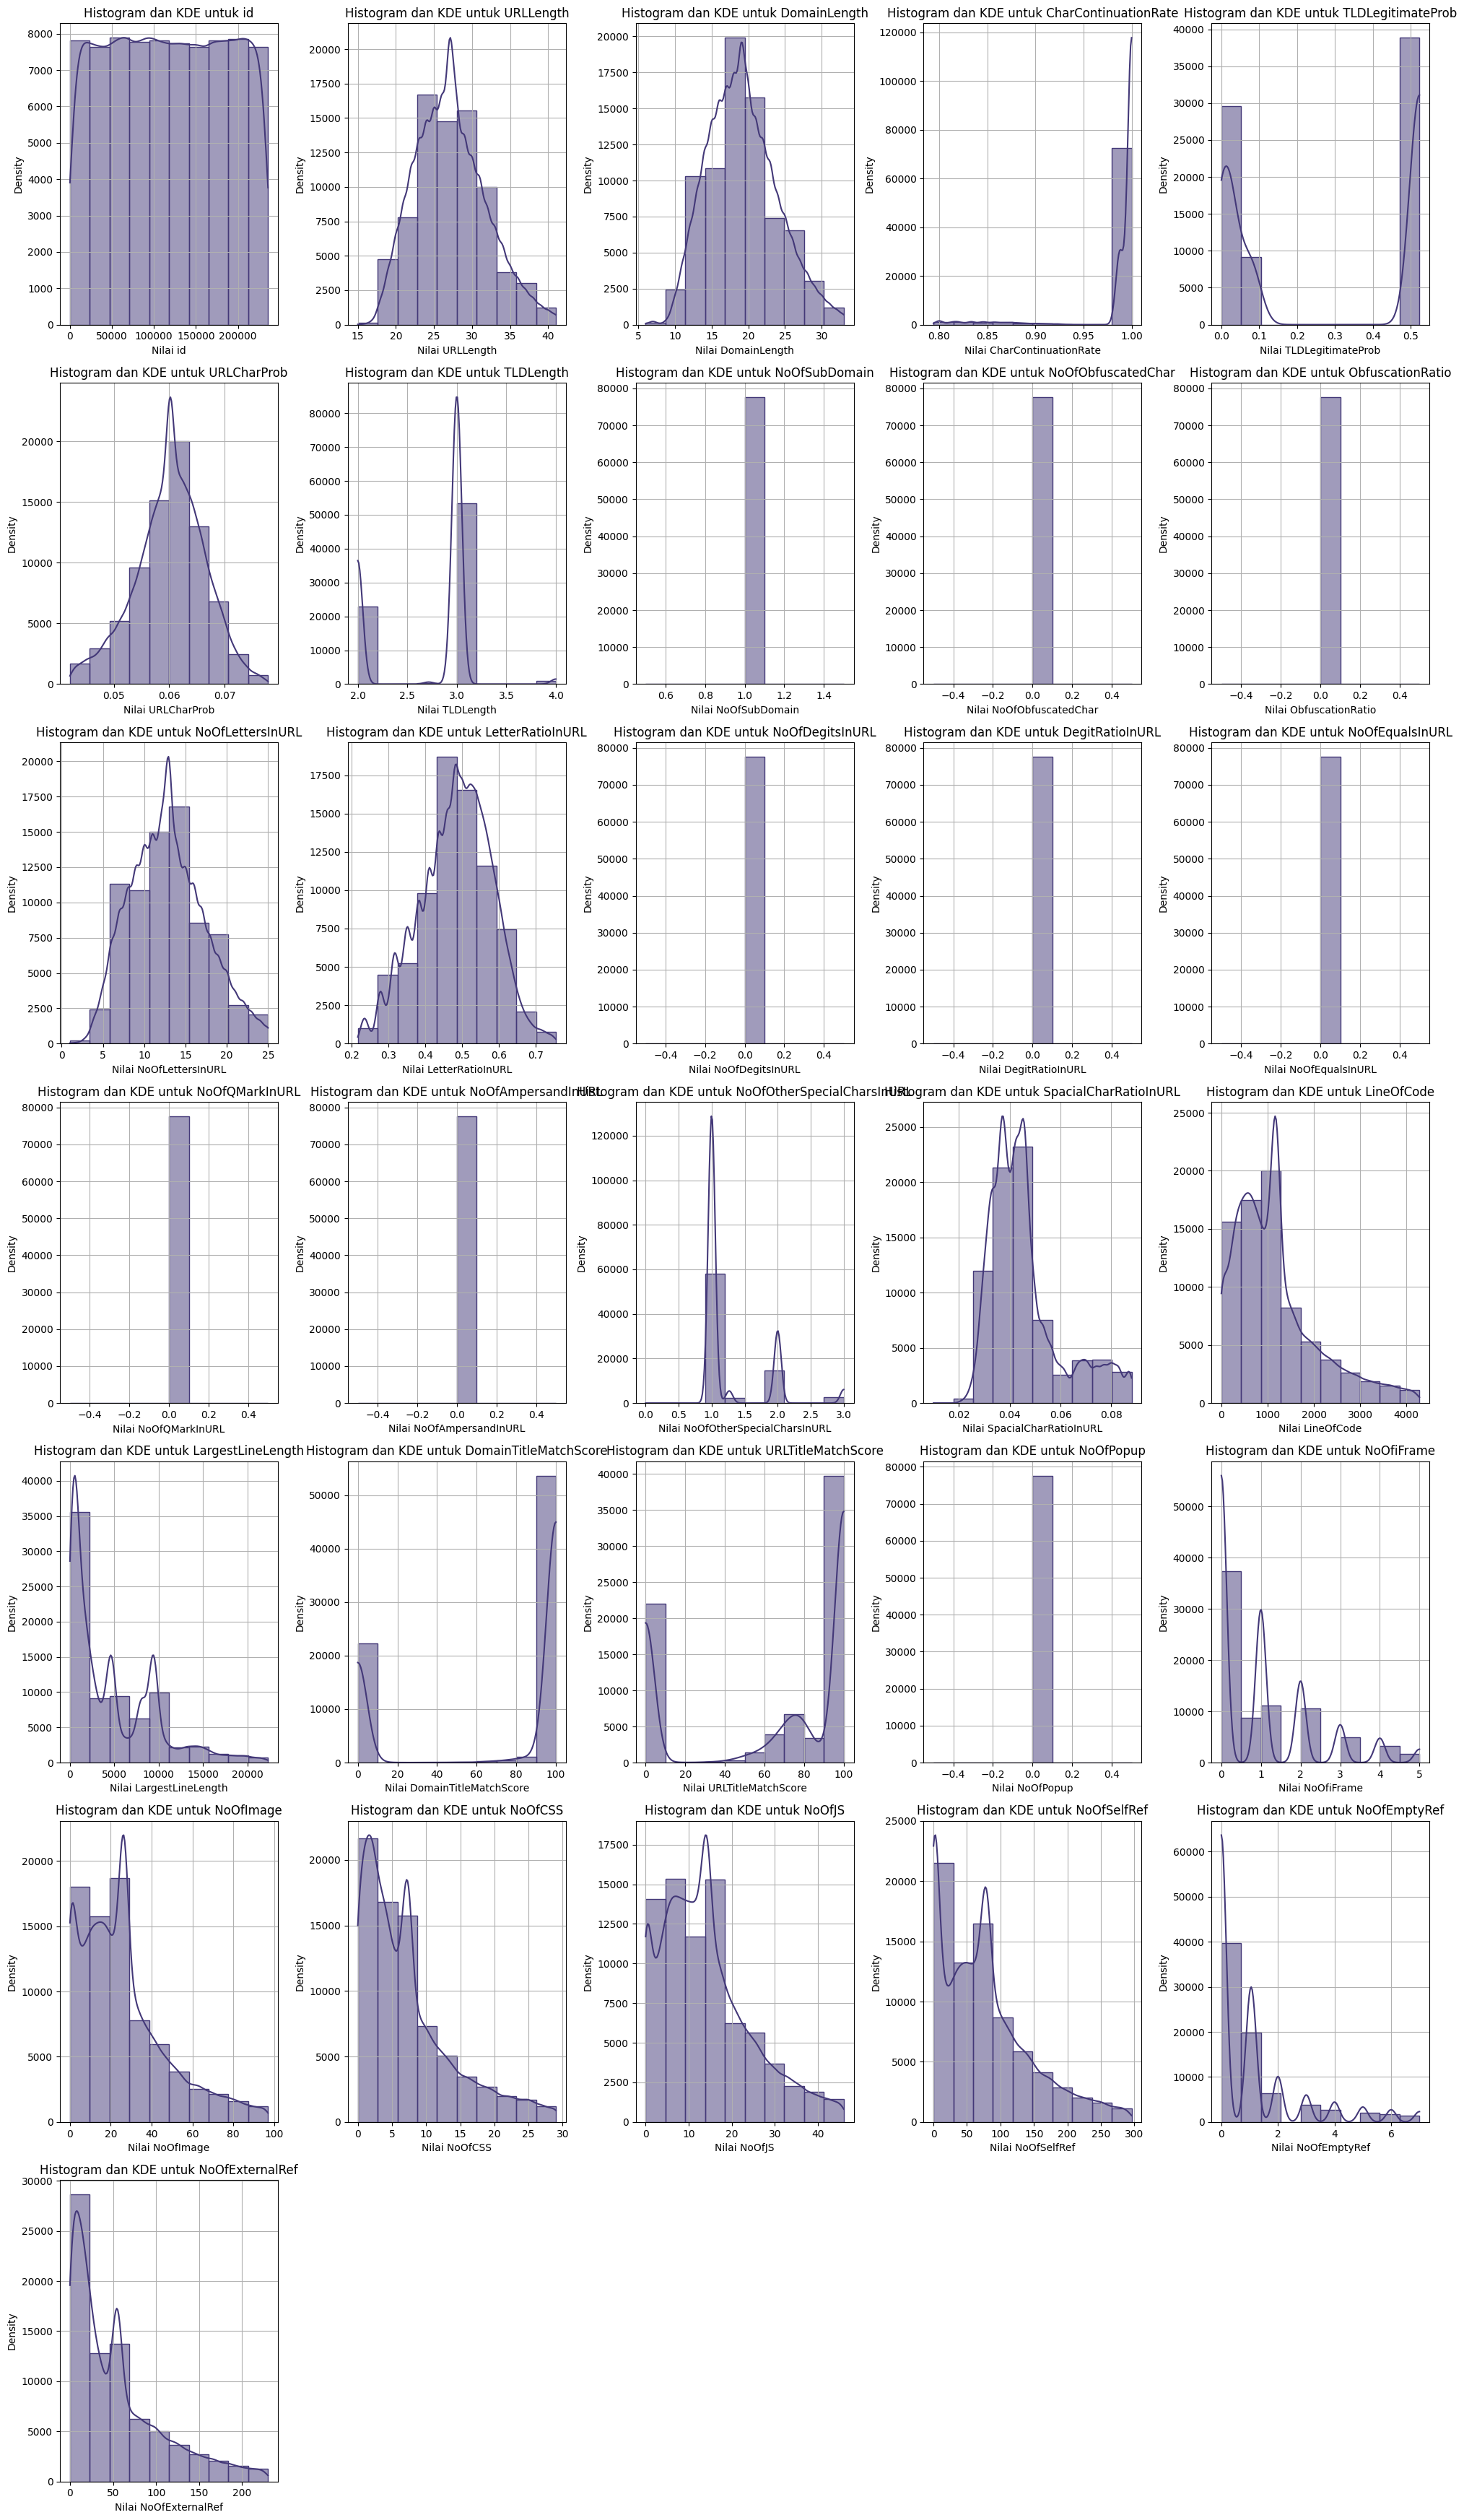

In [69]:
# Distribution numerical
columns_gt2 = [col for col in df.columns if df[col].nunique() > 2 and df[col].dtype in ['int64', 'float64']] # Memilih atribut int64, float64, dan yang unique valuenya lebih dari 2 (numerical variables)

cols = 5
rows = -(-len(columns_gt2) // cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten()

hist_color = '#433878'
edge_color = '#433878'

for idx, col in enumerate(columns_gt2):
    sns.histplot(train_set[col], kde=True, bins=10, ax=axes[idx], color=hist_color, edgecolor=edge_color)
    axes[idx].set_title(f'Histogram dan KDE untuk {col}')
    axes[idx].set_xlabel(f'Nilai {col}')
    axes[idx].set_ylabel('Density')
    axes[idx].grid(True)

for idx in range(len(columns_gt2), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


<Axes: >

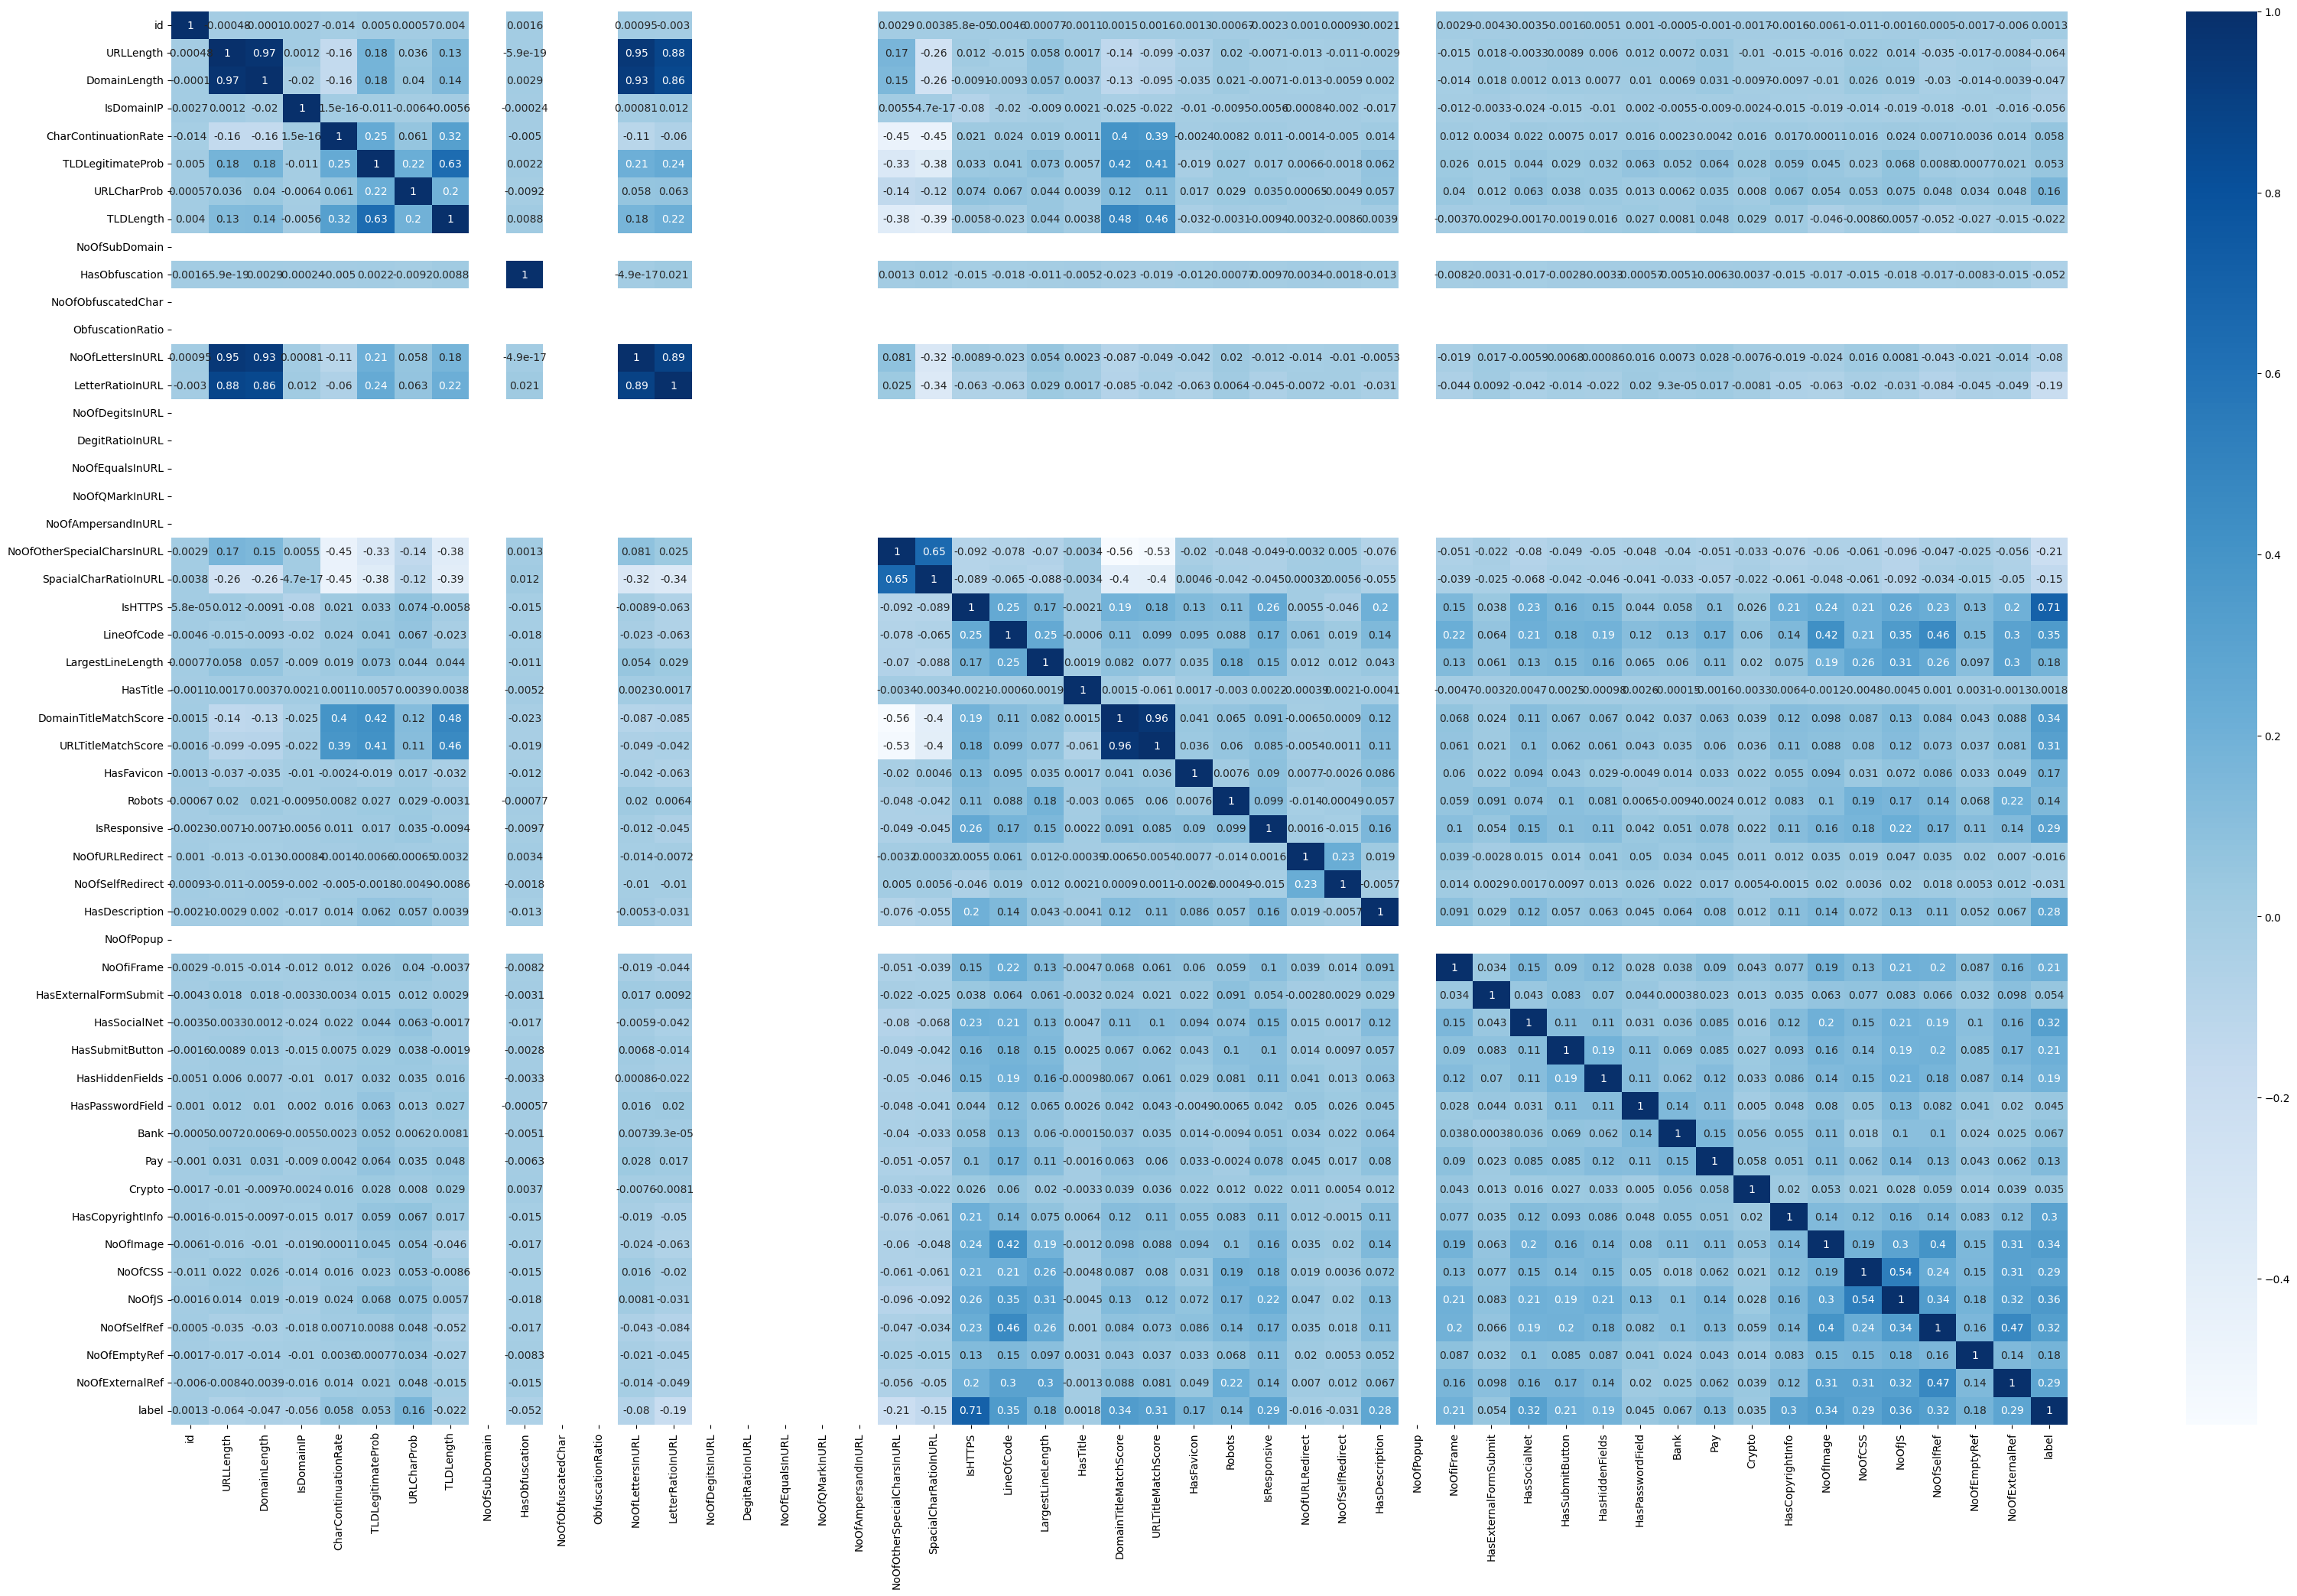

In [70]:
#correlations between features using seaborn heatmap
corr = train_set.select_dtypes(include = ["int64","float64"]).corr()
plt.figure(figsize=(40,24))
sns.heatmap(corr, cmap="Blues",annot=True)

-Fitur diatas yg dipake karena korelasi tertinggi baik dari categorical + numerical
-apapun yang berhubungan sama url characteristics udah dibahas di EDA kalo mereka gaada hubungan signifikan jadi di drop

NOTES : MAYBE FEATURE URLlength + Domain bisa dicombine aja, sama TLDLegit DomainTitleMatchscore juga karena they both share high correlation, mending salah satu di drop atau dicombine supaya menghindari multicolinearity

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [71]:
print("Rows before dropping duplicates:", len(train_set))
train_set.drop_duplicates(inplace=True)
print("Rows after dropping duplicates:", len(train_set))

train_set.reset_index(drop=True, inplace=True)

Rows before dropping duplicates: 77628
Rows after dropping duplicates: 77628


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

Feature Selection

1. Drop URL sama Domain yang punya corr tinggi (hindarin multicolinearity)
2. Ada beberapa fitur yang setelah dilakukan pembersihan menghasil kan nilai modus yang sama yaitu 1, di drop aja

In [72]:
FEATURES_TO_DROP2 = [
'NoOfLettersInURL', 
'DomainLength', 
'DomainTitleMatchScore',
'CharContinuationRate',
'TLDLength',
'TLDLegitimateProb',
"NoOfSubDomain",
'NoOfObfuscatedChar',
"ObfuscationRatio",
'NoOfDegitsInURL',
'DegitRatioInURL',
'NoOfEqualsInURL',
'NoOfQMarkInURL',
'NoOfAmpersandInURL',
'NoOfPopUp'
]

In [73]:
train_set['IsHighURLMatchScore'] = train_set['URLTitleMatchScore'].apply(lambda x: 1 if x > 20 else 0)
val_set['IsHighURLMatchScore'] = val_set['URLTitleMatchScore'].apply(lambda x: 1 if x > 20 else 0)

In [74]:
output_path = "train_clean.csv"  # Nama file output
train_set.to_csv(output_path, index=False) 

In [75]:
train_clean = pd.read_csv("train_clean.csv")

In [76]:
# from concurrent.futures import ThreadPoolExecutor
# import ssl
# import socket

# def is_https_and_valid_ssl(url):
#     try:
#         host = url.split('/')[2]
#         context = ssl.create_default_context()
#         with socket.create_connection((host, 443), timeout=5) as sock:
#             with context.wrap_socket(sock, server_hostname=host) as ssock:
#                 cert = ssock.getpeercert()
#                 return 1
#     except:
#         return 0

# # Parallelize using ThreadPoolExecutor
# def check_urls_parallel(urls):
#     with ThreadPoolExecutor(max_workers=10) as executor:  # Adjust max_workers for parallelism
#         results = list(executor.map(is_https_and_valid_ssl, urls))
#     return results

# # Apply parallel processing
# train_clean['is_https_and_ssl_valid'] = check_urls_parallel(train_clean['URL'])


In [77]:
# import requests

# def is_https_and_ssl_valid_api(url):
#     api_url = f"https://api.ssllabs.com/api/v3/analyze?host={url.split('/')[2]}"
#     try:
#         response = requests.get(api_url)
#         if response.status_code == 200 and 'status' in response.json():
#             return 1 if response.json()['status'] == 'READY' else 0
#     except:
#         return 0

# train_clean['is_https_and_ssl_valid'] = train_clean['URL'].apply(is_https_and_ssl_valid_api)


#### Domain-Specific Feature Engineering
Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

In [78]:
# import ssl
# import socket

# def is_https_and_valid_ssl(url):
#     try:
#         host = url.split('/')[2]
#         context = ssl.create_default_context()
#         with socket.create_connection((host, 443), timeout=5) as sock:
#             with context.wrap_socket(sock, server_hostname=host) as ssock:
#                 cert = ssock.getpeercert()
#                 return 1  # Jika berhasil, SSL valid
#     except:
#         return 0  # Jika gagal, SSL tidak valid atau tidak menggunakan HTTPS

# bersih_df['is_https_and_ssl_valid'] = train_set['url'].apply(is_https_and_valid_ssl)


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [79]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin
 
# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [80]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd

class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = RobustScaler()
        self.num_columns = None  # Placeholder for numerical columns
        self.url_title_column = 'URLTitleMatchScore'

    def fit(self, X, y=None):
        # Identify numerical columns excluding the 'URLTitleMatchScore' column and columns with nunique=2
        self.num_columns = [
            col for col in X.select_dtypes(include=['int64', 'float64']).columns
            if col != self.url_title_column and X[col].nunique() > 2
        ]
        
        # Fit the RobustScaler to the numerical columns
        self.scaler.fit(X[self.num_columns])
        return self

    def transform(self, X):
        # Copy the DataFrame to avoid modifying the original
        X_transformed = X.copy()
        
        # Apply RobustScaler to the numerical columns
        if self.num_columns:  # Ensure there are columns to scale
            X_transformed[self.num_columns] = self.scaler.transform(X[self.num_columns])
        
        # Apply Log Transformation to 'URLTitleMatchScore'
        if self.url_title_column in X_transformed.columns:
            X_transformed[self.url_title_column] = X_transformed[self.url_title_column].apply(
                lambda x: np.log1p(x) if pd.notna(x) and x >= 0 else np.nan
            )
        
        return X_transformed


### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [81]:
# Gaada Categorical Lagi

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [82]:
# Plot class distribution
def plot_classes(y):
    plt.title("Class distribution")
    plt.pie(x=y.value_counts(), autopct='%.2f', labels=["0", "1"])
    
    print(y.value_counts())
    print()

1.0    71828
0.0     5800
Name: label, dtype: int64



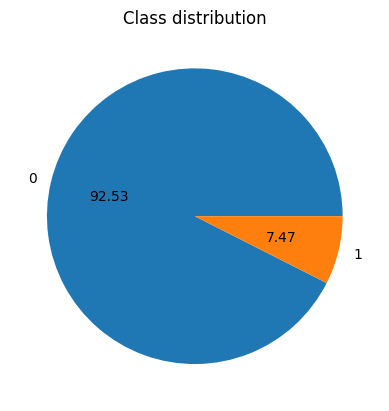

In [83]:
plot_classes(train_set['label'])

In [84]:
from imblearn.over_sampling import SMOTE

def balance_classes(X_t, y_t):
    sm = SMOTE(random_state=42)
    X_t_res, y_t_res = sm.fit_resample(X_t, y_t)
    return X_t_res, y_t_res

In [85]:
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class PCATransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.pca = PCA(n_components=self.n_components)
        self.num_columns = None
        self.pca_columns = None

    def fit(self, X, y=None):
        # Identify numerical columns
        numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
        
        # Filter for continuous columns (unique values > 2)
        self.num_columns = [col for col in numerical_cols if X[col].nunique() > 2]
        
        # Fit PCA on the selected numerical columns
        self.pca.fit(X[self.num_columns])
        
        # Create column names for PCA components
        self.pca_columns = [f'PCA_{i+1}' for i in range(self.pca.n_components_)]
        return self

    def transform(self, X):
        """
        Apply PCA transformation to the selected columns and return the modified DataFrame.
        """
        X_transformed = X.copy()
        
        # Apply PCA to the selected numerical columns
        pca_result = self.pca.transform(X[self.num_columns])
        
        # Create a DataFrame for PCA components
        pca_df = pd.DataFrame(pca_result, columns=self.pca_columns, index=X.index)
        
        # Drop the original numerical columns and concatenate PCA components
        X_transformed = X_transformed.drop(columns=self.num_columns, errors='ignore')
        X_transformed = pd.concat([X_transformed, pca_df], axis=1)
        
        return X_transformed


# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [86]:
from sklearn.pipeline import Pipeline

# Note: You can add or delete preprocessing components from this pipeline

pipe = Pipeline([("pca", PCATransformer()),
                ("dropper",FeatureDropper(FEATURES_TO_DROP2)),
                 ("scaler", FeatureScaler()),
])

train_set = pipe.fit_transform(train_set)
val_set = pipe.transform(val_set)

In [87]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [88]:
def match_columns(train, test):
    # Get list of columns in training set
    train_cols = train.columns.tolist()
    
    # Get list of columns in test set
    test_cols = test.columns.tolist()
    
    # Remove any columns in test set that aren't in training set
    for col in test_cols:
        if col not in train_cols:
            test = test.drop(col, axis=1)
    
    # Add any missing columns to test set and fill with 0
    for col in train_cols:
        if col not in test_cols:
            test[col] = 0
    
    # Reorder columns in test set to match training set
    test = test[train_cols]
    
    # Return modified test set
    return test

In [89]:
# Match the columns
val_set = match_columns(train_set, val_set)

In [90]:
train_set.columns = train_set.columns.str.strip()

In [91]:
X_train = train_set.drop(['label'], axis=1)
y_train = train_set['label']

In [92]:
# Identify float columns in X_train
binary_float_features = X_train.select_dtypes(include=['float', 'int']).columns

# Check columns with only binary-like values (0, 1, NaN)
binary_like_features = [
    feature for feature in binary_float_features
    if X_train[feature].nunique() <= 2
]

# Categorical columns + binary-like float columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
all_categorical_features = list(binary_like_features) + list(categorical_features)

all_categorical_features = [feature for feature in all_categorical_features if feature not in ['NoOfURLRedirect', 'NoOfSelfRedirect','FILENAME','URL', 'Domain', 'Title']]
all_categorical_features.append('label')

In [93]:
categorical_features_df = pd.DataFrame(all_categorical_features, columns=['Categorical Features'])
categorical_features_df.index = range(1, len(categorical_features_df) + 1)

categorical_features_df

,Categorical Features
1,IsDomainIP
2,HasObfuscation
3,IsHTTPS
4,HasTitle
5,HasFavicon
6,Robots
7,IsResponsive
8,HasDescription
9,NoOfPopup
10,HasExternalFormSubmit


In [94]:
X_train.head()

,IsDomainIP,HasObfuscation,IsHTTPS,HasTitle,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,...,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22
0,0.0,0.0,1,1,1.0,0.0,1.0,0.0,0.0,1.0,...,-0.047516,-0.490178,-0.144283,0.113181,0.282544,-0.425593,-0.068508,0.324684,-0.250955,-0.168699
1,0.0,0.0,1,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.976728,-0.694131,0.063715,-0.201942,-0.477716,-0.048047,0.425621,-0.466056,0.055865,0.550054
2,0.0,0.0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,...,-11.575289,-0.248135,-33.754601,0.692151,0.310906,1.873721,-8.192376,0.499194,-0.977264,0.310439
3,0.0,0.0,1,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.127874,-0.070024,-0.112301,0.291833,0.600533,-0.378389,-0.382659,0.402883,-0.435862,-0.622519
4,0.0,0.0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,...,-0.769752,0.534259,0.089171,0.305124,0.642549,-0.673581,1.997014,0.394839,-1.283570,-0.032545


In [95]:
X_train.dtypes

IsDomainIP               float64
HasObfuscation           float64
IsHTTPS                    int64
HasTitle                   int64
HasFavicon               float64
Robots                   float64
IsResponsive             float64
NoOfURLRedirect          float64
NoOfSelfRedirect         float64
HasDescription           float64
NoOfPopup                float64
HasExternalFormSubmit    float64
HasSocialNet             float64
HasSubmitButton          float64
HasHiddenFields          float64
HasPasswordField         float64
Bank                     float64
Pay                      float64
Crypto                   float64
HasCopyrightInfo         float64
IsHighURLMatchScore        int64
PCA_1                    float64
PCA_2                    float64
PCA_3                    float64
PCA_4                    float64
PCA_5                    float64
PCA_6                    float64
PCA_7                    float64
PCA_8                    float64
PCA_9                    float64
PCA_10    

In [96]:
X_train.shape

(77628, 43)

1.0    71828
0.0     5800
Name: label, dtype: int64



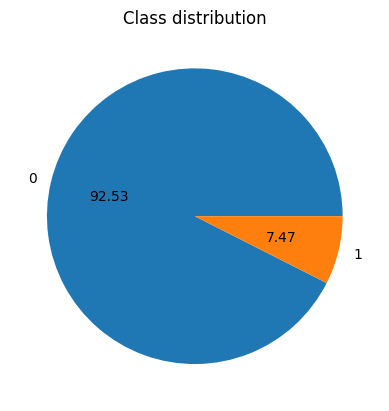

In [97]:
plot_classes(y_train)

In [98]:
X_test = val_set.drop(['label'], axis=1)
y_test = val_set['label']

In [99]:
X_test.shape

(19289, 43)

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `label`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [100]:
# import numpy as np

# class BallTree:
#     def __init__(self, points, labels=None, leaf_size=40):
#         self.points = np.array(points, dtype=float)
#         self.labels = np.array(labels) if labels is not None else None
#         self.leaf_size = leaf_size
#         self.tree = self._build_tree(np.arange(len(points)))

#     def _build_tree(self, indices):
#         if len(indices) <= self.leaf_size:
#             return {"indices": indices}

#         # Find the dimension with the largest spread
#         data = self.points[indices]
#         centroid = np.mean(data, axis=0)
#         diff = data - centroid
#         dimension = np.argmax(np.ptp(data, axis=0))
        
#         # Split points into two groups based on their distance from the centroid
#         distances = diff[:, dimension]
#         median = np.median(distances)
#         left = indices[distances <= median]
#         right = indices[distances > median]

#         return {
#             "dimension": dimension,
#             "median": median,
#             "left": self._build_tree(left),
#             "right": self._build_tree(right),
#         }

#     def _query(self, point, k, node, heap):
#         if "indices" in node:
#             # Base case: leaf node
#             distances = np.sqrt(np.sum((self.points[node["indices"]] - point) ** 2, axis=1))
#             for i, d in zip(node["indices"], distances):
#                 if len(heap) < k:
#                     heap.append((d, i))
#                     heap.sort(reverse=True)
#                 elif d < heap[0][0]:
#                     heap[0] = (d, i)
#                     heap.sort(reverse=True)
#             return

#         # Recurse on child nodes
#         dimension = node["dimension"]
#         median = node["median"]
#         if point[dimension] <= median:
#             self._query(point, k, node["left"], heap)
#             if len(heap) < k or abs(point[dimension] - median) < heap[0][0]:
#                 self._query(point, k, node["right"], heap)
#         else:
#             self._query(point, k, node["right"], heap)
#             if len(heap) < k or abs(point[dimension] - median) < heap[0][0]:
#                 self._query(point, k, node["left"], heap)

#     def query(self, point, k):
#         heap = []
#         self._query(point, k, self.tree, heap)
#         return sorted(heap)

# class KNN:
#     def __init__(self, k=5):
#         self.k = k

#     def fit(self, X_train, y_train):
#         self.X_train = np.array(X_train, dtype=float)
#         self.y_train = np.array(y_train)
#         self.tree = BallTree(self.X_train, self.y_train)

#     def predict(self, X_test):
#         X_test = np.array(X_test, dtype=float)
#         predictions = []
#         for x in X_test:
#             neighbors = self.tree.query(x, self.k)
#             labels = [self.y_train[i] for _, i in neighbors]
#             predictions.append(max(set(labels), key=labels.count))
#         return predictions


In [101]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
import jihan_knn

y_train = y_train.astype(float)
y_test = y_test.astype(float)

knn = jihan_knn.KNN(k=5, metric='manhattan')
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
# accuracy = knn.evaluate(X_test, y_test)
# print(accuracy)
# Dynamically determine unique classes
unique_classes = np.unique(y_test)
target_names = [f"Class {c}" for c in unique_classes]

# Generate detailed classification report
report = classification_report(y_test, preds, target_names=target_names)
print("Classification Report:")
print(report)

KeyboardInterrupt: 

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
import numpy as np

# Train the KNN model
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# Make predictions
preds = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Sklearn Accuracy: {accuracy:.3f} %")

# Calculate F1-Score (macro average)
f1_macro = f1_score(y_test, preds, average='macro')
print(f"F1 Macro Average: {f1_macro:.3f}")

# Dynamically determine unique classes
unique_classes = np.unique(y_test)
target_names = [f"Class {c}" for c in unique_classes]

# Generate detailed classification report
report = classification_report(y_test, preds, target_names=target_names)
print("Classification Report:")
print(report)


Sklearn Accuracy: 0.996 %
F1 Macro Average: 0.985
Classification Report:
              precision    recall  f1-score   support

   Class 0.0       0.95      0.99      0.97      1445
   Class 1.0       1.00      1.00      1.00     17844

    accuracy                           1.00     19289
   macro avg       0.98      0.99      0.98     19289
weighted avg       1.00      1.00      1.00     19289



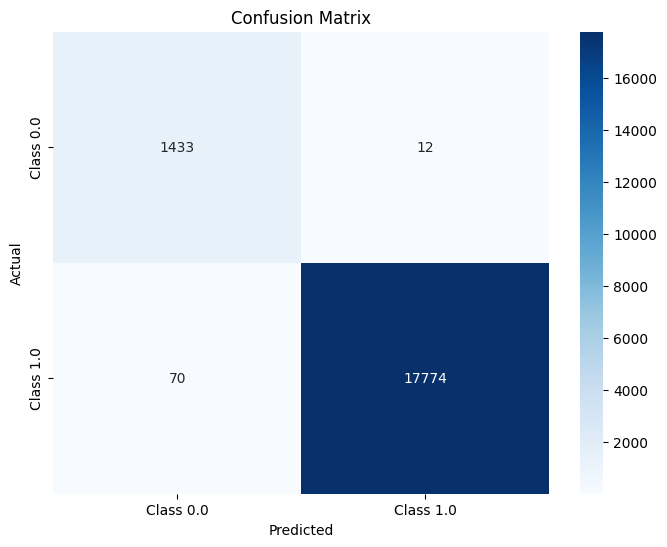

In [50]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
conf_matrix = confusion_matrix(y_test, preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## B. Naive Bayes

In [51]:
# Type your code here

## C. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [52]:
# Type your code here

## D. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `label` column.

Note: Adjust step 1 and 2 to your implementation of the preprocessing step if you don't use pipeline API from `sklearn`.

In [53]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`